In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import ephem_association as ea
import importlib
importlib.reload(ea)
import pandas as pd
import numpy as np
from astropy.time import Time
from IPython.display import display, Markdown, Latex

In [3]:
initial_traj = pd.read_parquet("candidates1/trajectory_orb.parquet")
initial_orb = pd.read_parquet("candidates1/orbital.parquet")

traj_15_2_2 = pd.read_parquet("candidates4_15_2_2/trajectory_orb.parquet")
orb_15_2_2 = pd.read_parquet("candidates4_15_2_2/orbital.parquet")

In [4]:
init_sso = ["FF2022aaaaawj",
    "FF2022aaaaawi",
    "FF2022aaaaawm",
    "FF2022aaaaawn",
    "FF2022aaaaawo",
    "FF2022aaaaawp"]

In [5]:
follow_up_traj = initial_traj[initial_traj["ssoCandId"].isin(init_sso)]
follow_up_orb = initial_orb[initial_orb["ssoCandId"].isin(init_sso)]

In [6]:
tmp = traj_15_2_2[traj_15_2_2["candid"].isin(follow_up_traj["candid"])].groupby("ssoCandId").agg(list).reset_index()

In [7]:
assoc_traj = traj_15_2_2.merge(follow_up_traj, on="candid")

In [8]:
assoc_follow_up_table = assoc_traj[["ssoCandId_y", "ssoCandId_x"]].drop_duplicates()
assoc_follow_up_table["old_number"] = [57262, 57392, 57417, 57529, 57438]
assoc_follow_up_table

,ssoCandId_y,ssoCandId_x,old_number
0,FF2022aaaaawi,FF2023aaaaalx,57262
6,FF2022aaaaawm,FF2023aaaaama,57392
11,FF2022aaaaawn,FF2023aaaaamb,57417
18,FF2022aaaaawo,FF2023aaaaamc,57529
24,FF2022aaaaawp,FF2023aaaaamd,57438


In [9]:
def df_compare(df1, df2):
    df_left = df1.drop(["dcmag", "dcmag_err"], axis=1)
    df_left = df_left.reindex(sorted(df_left.columns), axis=1).reset_index(drop=True)
    df_right = df2.reindex(sorted(df2.columns), axis=1).reset_index(drop=True)


    return df_left.compare(df_right)

In [10]:
for _, rows in assoc_follow_up_table.iterrows():
    print(df_compare(
        initial_traj[initial_traj["ssoCandId"] == rows["ssoCandId_y"]],
        traj_15_2_2[traj_15_2_2["ssoCandId"] == rows["ssoCandId_x"]]
    ).to_markdown(index=False, tablefmt="simple"))
    print()
    print()

('ssoCandId', 'self')    ('ssoCandId', 'other')
-----------------------  ------------------------
FF2022aaaaawi            FF2023aaaaalx
FF2022aaaaawi            FF2023aaaaalx
FF2022aaaaawi            FF2023aaaaalx
FF2022aaaaawi            FF2023aaaaalx
FF2022aaaaawi            FF2023aaaaalx
FF2022aaaaawi            FF2023aaaaalx


('ssoCandId', 'self')    ('ssoCandId', 'other')
-----------------------  ------------------------
FF2022aaaaawm            FF2023aaaaama
FF2022aaaaawm            FF2023aaaaama
FF2022aaaaawm            FF2023aaaaama
FF2022aaaaawm            FF2023aaaaama
FF2022aaaaawm            FF2023aaaaama
FF2022aaaaawm            FF2023aaaaama


('ssoCandId', 'self')    ('ssoCandId', 'other')
-----------------------  ------------------------
FF2022aaaaawn            FF2023aaaaamb
FF2022aaaaawn            FF2023aaaaamb
FF2022aaaaawn            FF2023aaaaamb
FF2022aaaaawn            FF2023aaaaamb
FF2022aaaaawn            FF2023aaaaamb
FF2022aaaaawn            FF2023aaaaamb


# Extended trajectories and orbit

### 15_2_2 data

In [11]:
traj_15_2_2_follow = traj_15_2_2[traj_15_2_2["ssoCandId"].isin(assoc_follow_up_table["ssoCandId_x"])]
orb_15_2_2_follow = orb_15_2_2[orb_15_2_2["ssoCandId"].isin(assoc_follow_up_table["ssoCandId_x"])]

#### extends trajectories

#### with new ephemeries associations

In [32]:
extended_traj = []
extended_orbit = []
hist_orbit = []

for ssoId in assoc_follow_up_table.ssoCandId_x:

    test_traj = traj_15_2_2_follow[traj_15_2_2_follow["ssoCandId"] == ssoId].sort_values("jd")
    test_orb = orb_15_2_2_follow[orb_15_2_2_follow["ssoCandId"] == ssoId]

    (new_traj, new_orbit), tmp_hist = ea.ephem_association_new(test_traj, test_orb)

    extended_traj.append(new_traj)
    extended_orbit.append(new_orbit)
    hist_orbit.append(tmp_hist)

extended_traj = pd.concat(extended_traj)
extended_orbit = pd.concat(extended_orbit)
hist_orbit = pd.concat([hist for el in hist_orbit for hist in el])

Markdown(ea.extended_traj_table(extended_traj, extended_orbit, assoc_follow_up_table))


|Fink Internal Id|Nb point|last observation|observation window(day)|magnitude<br>g:[min, max]<br>r:[min, max]|a (AU)|e|i (degree)|
|----------------|--------|----------------|-----------------------|-----------------------------------------|------|-|----------|
|15_2_2: FF2023aaaaalx<br>old: FF2022aaaaawi|15|2022-9-7|28|g:[18.21, 18.49]<br>r:[17.68, 17.98]|15.900 ± 0.000|0.760 ± 0.000|2.663 ± 0.000
|15_2_2: FF2023aaaaama<br>old: FF2022aaaaawm|13|2022-9-27|36|g:[16.89, 17.39]<br>r:[16.40, 17.26]|18.581 ± 0.000|0.750 ± 0.000|3.690 ± 0.000
|15_2_2: FF2023aaaaamb<br>old: FF2022aaaaawn|18|2022-9-19|33|g:[18.07, 18.40]<br>r:[17.68, 17.90]|12.872 ± 0.000|0.702 ± 0.000|2.561 ± 0.000
|15_2_2: FF2023aaaaamc<br>old: FF2022aaaaawo|7|2022-08-29|12|g:[20.21, 20.51]<br>r:[19.65, 19.75]|2.354 ± 0.029|0.239 ± 0.003|5.378 ± 0.138
|15_2_2: FF2023aaaaamd<br>old: FF2022aaaaawp|8|2022-9-2|11|g:[19.14, 19.25]<br>r:[18.56, 18.77]|3.905 ± 0.058|0.299 ± 0.005|3.645 ± 0.056


#### with old ephemeries associations

In [34]:
extended_traj_old, extended_orbit_old = ea.extend_sso_traj(
    traj_15_2_2_follow,
    orb_15_2_2_follow,
    "traj_15_2_2_extended.parquet",
    "orb_15_2_2_extended.parquet"
)
Markdown(ea.extended_traj_table(extended_traj_old.sort_values(["ssoCandId", "jd"]), extended_orbit_old, assoc_follow_up_table, suffix="_x"))


|Fink Internal Id|Nb point|last observation|observation window(day)|magnitude<br>g:[min, max]<br>r:[min, max]|a (AU)|e|i (degree)|
|----------------|--------|----------------|-----------------------|-----------------------------------------|------|-|----------|
|15_2_2: FF2023aaaaalx<br>old: FF2022aaaaawi|20|nan|28|g:[18.21, 18.49]<br>r:[17.68, 17.98]|16.434 ± 0.000|0.769 ± 0.000|2.683 ± 0.000
|15_2_2: FF2023aaaaama<br>old: FF2022aaaaawm|16|nan|36|g:[16.89, 17.39]<br>r:[16.40, 17.26]|10.466 ± 0.000|0.577 ± 0.000|4.421 ± 0.000
|15_2_2: FF2023aaaaamb<br>old: FF2022aaaaawn|23|nan|73|g:[18.01, 18.49]<br>r:[17.68, 18.23]|7.145 ± 0.005|0.331 ± 0.000|3.292 ± 0.007
|15_2_2: FF2023aaaaamc<br>old: FF2022aaaaawo|9|nan|12|g:[20.21, 20.51]<br>r:[19.65, 19.75]|2.362 ± 0.021|0.244 ± 0.002|5.371 ± 0.097
|15_2_2: FF2023aaaaamd<br>old: FF2022aaaaawp|8|nan|11|g:[19.14, 19.25]<br>r:[18.56, 18.77]|1.115 ± 0.000|0.100 ± 0.000|0.054 ± 0.000


#### Orbital elements history

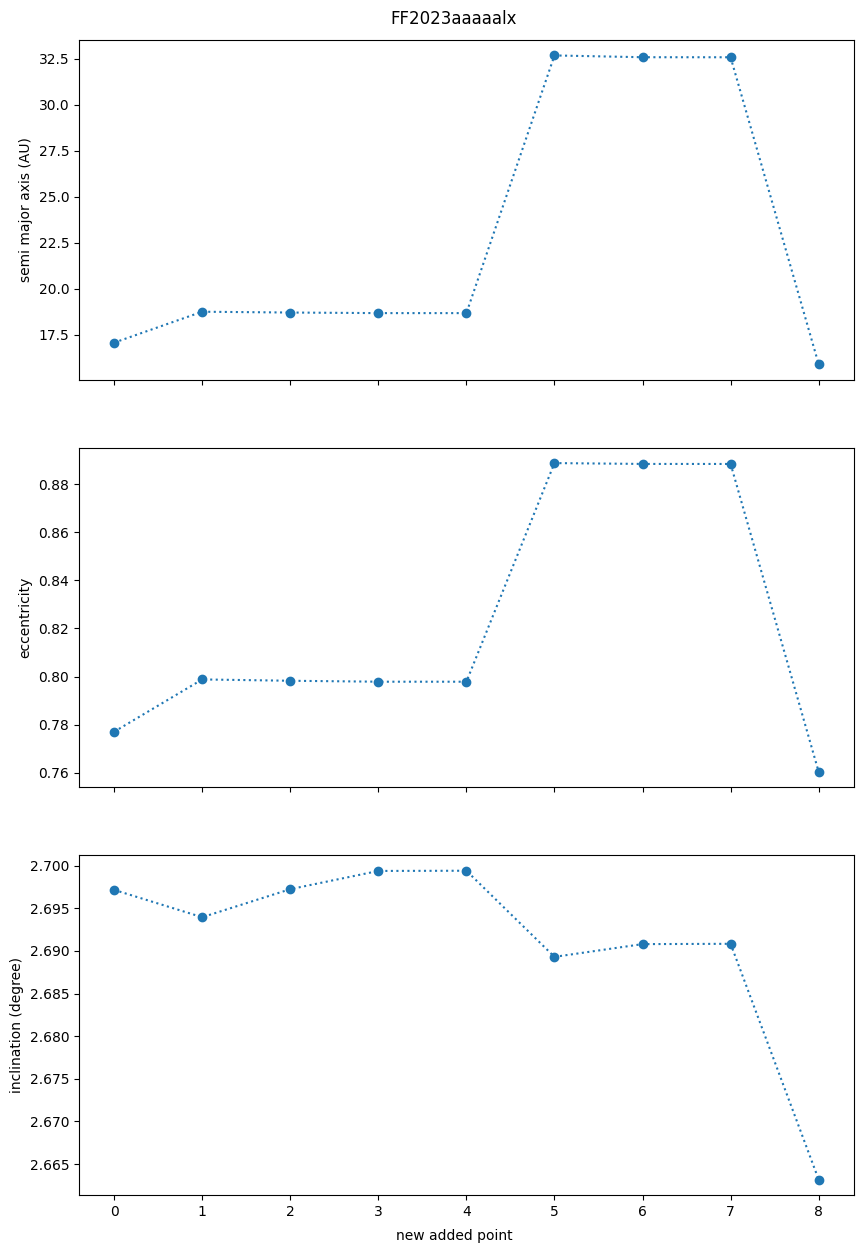

In [16]:
ea.plot_hist_orb(hist_orbit, "FF2023aaaaalx")

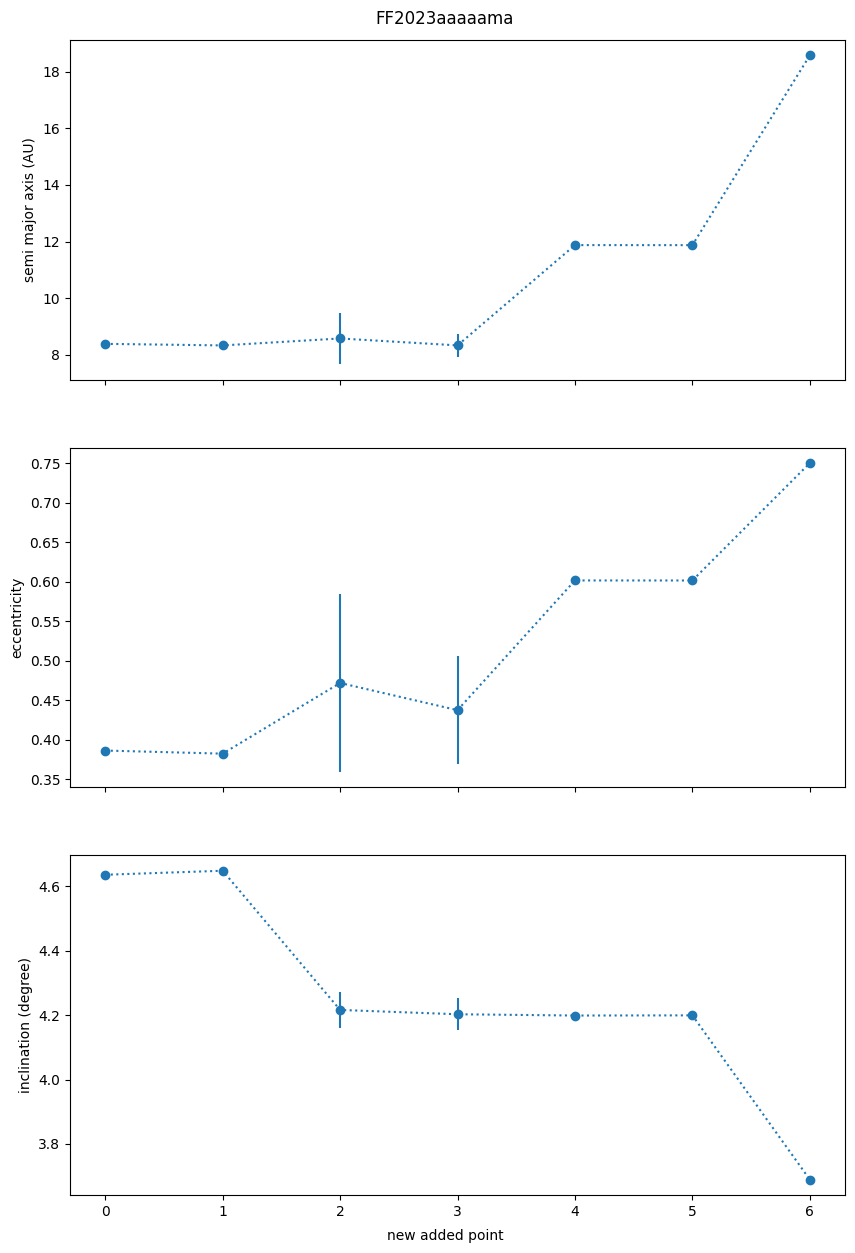

In [17]:
ea.plot_hist_orb(hist_orbit, "FF2023aaaaama")

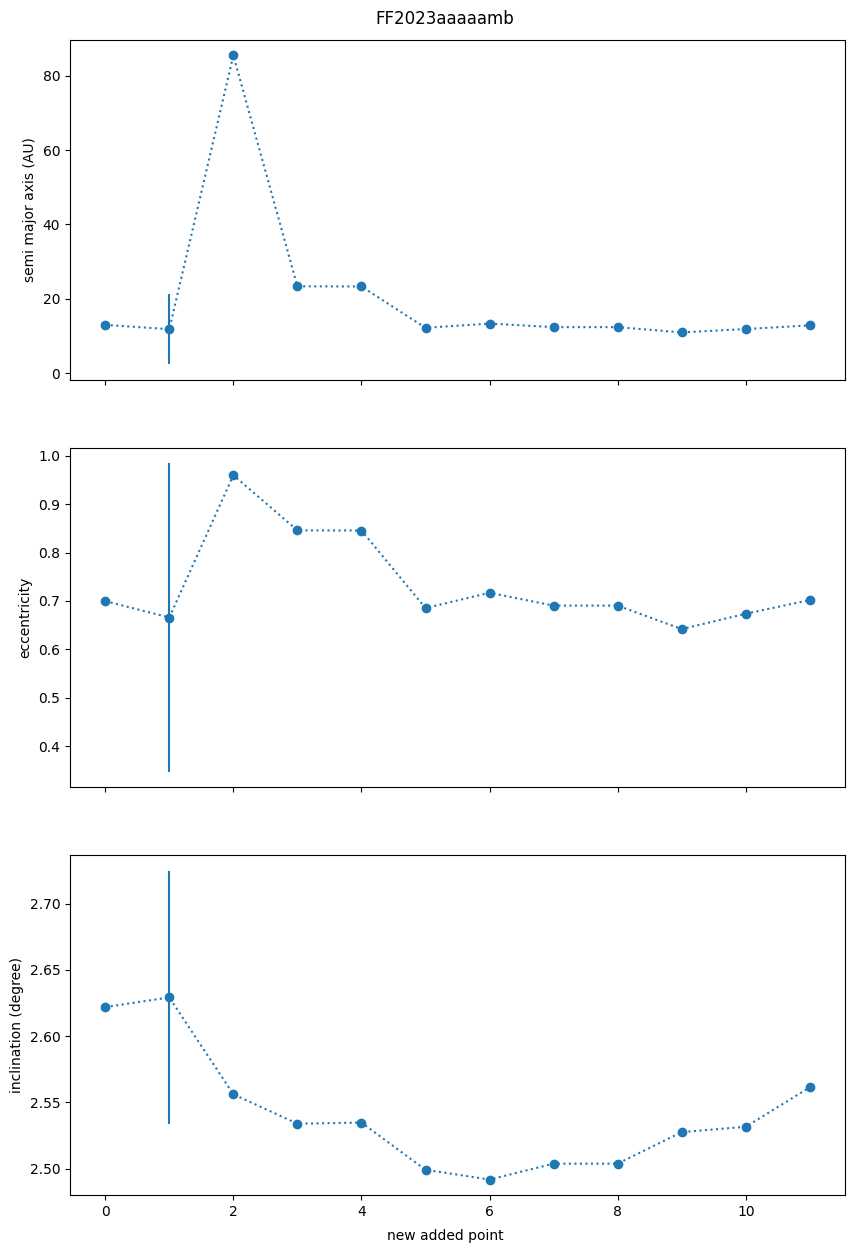

In [18]:
ea.plot_hist_orb(hist_orbit, "FF2023aaaaamb")

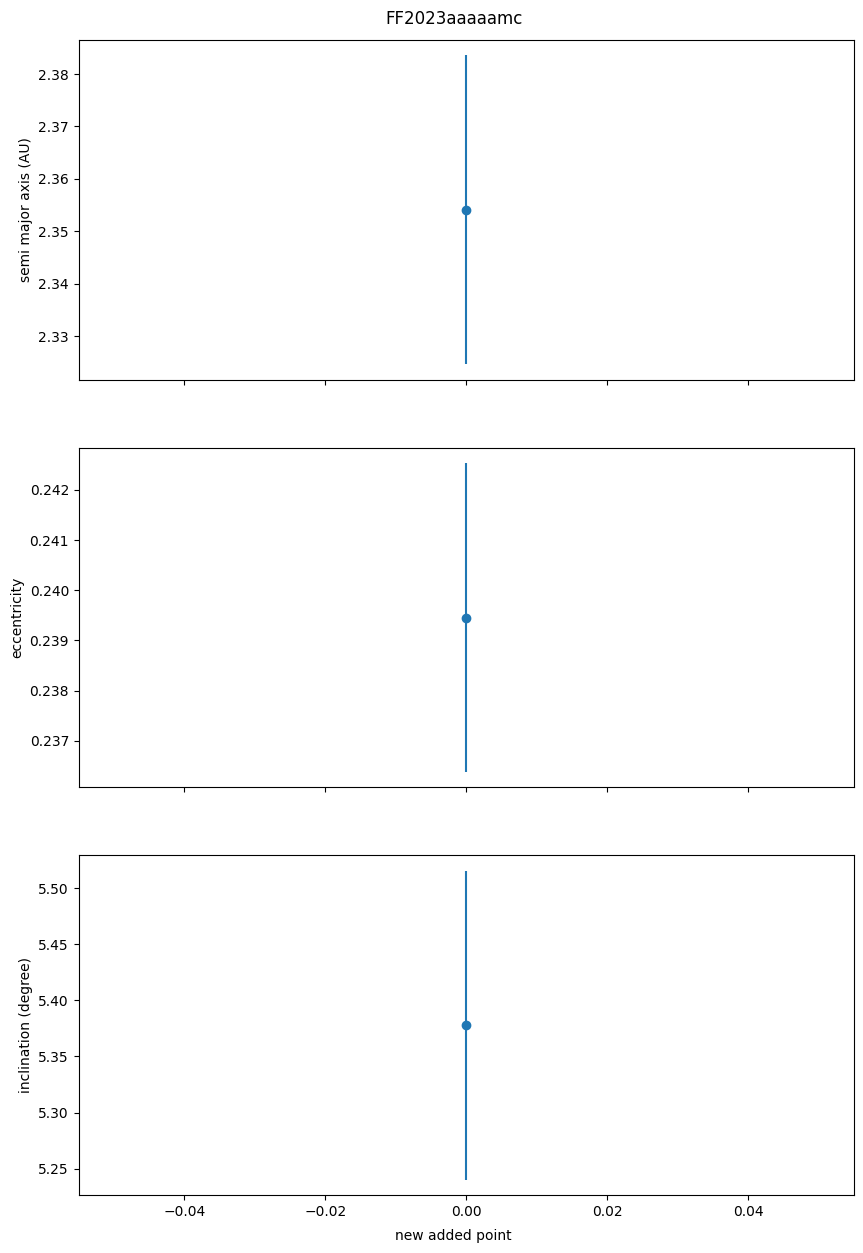

In [19]:
ea.plot_hist_orb(hist_orbit, "FF2023aaaaamc")

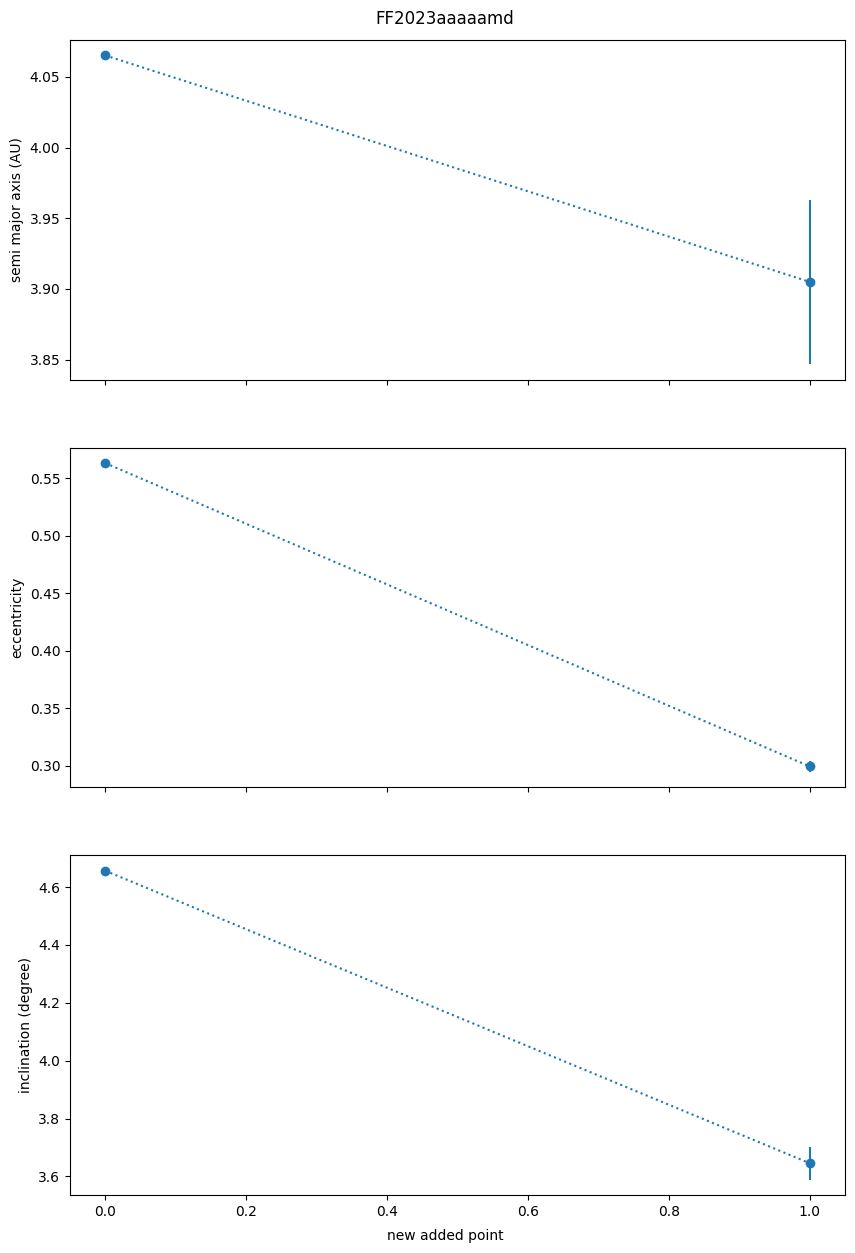

In [20]:
ea.plot_hist_orb(hist_orbit, "FF2023aaaaamd")

#### ephemeris deviation with william ephem

##### with original orbit

In [21]:
from sbpy.data import Orbit, Ephem
from astropy.coordinates import SkyCoord

times = ["2022-09-30 23:30:00", "2022-09-30 23:30:00", "2022-09-25 06:00:00", "2022-09-30 23:30:00", "2022-09-30 23:30:00"]

orb_15_2_2_old_number = orb_15_2_2_follow.merge(assoc_follow_up_table, left_on="ssoCandId", right_on="ssoCandId_x")
for index, ssoId in enumerate(orb_15_2_2_old_number.ssoCandId):
    print(ssoId)
    tmp_orb = orb_15_2_2_old_number[orb_15_2_2_old_number["ssoCandId"] == ssoId]

    old_ephem = pd.read_csv("ephem_followup/09-2022/{}.csv".format(tmp_orb["old_number"].values[0]))
    # ephem_epochs = Time(old_ephem["UTC"].values[-1])
    ephem = Ephem.from_oo(
            ea.df_to_orb(tmp_orb), epochs=Time(times[index]), location="I41", scope="basic"
        ).table.to_pandas()
    
    new_ephem_coord = SkyCoord(ephem["RA"], ephem["DEC"], unit="deg")

    index_time = np.where([i[:-4] == times[index] for i in old_ephem["UTC"].values])[0]
    old_ephem_coord = SkyCoord(old_ephem["RA"].values[index_time], old_ephem["DEC"].values[index_time], unit="deg")
    # print(ephem_epochs)
    print("2023 ephem: {} ra, {} dec".format(new_ephem_coord.ra, new_ephem_coord.dec))
    print("william ephem: {} ra, {} dec".format(old_ephem_coord.ra, old_ephem_coord.dec))
    print(new_ephem_coord.separation(old_ephem_coord))
    print("----")
    print()

FF2023aaaaalx
2023 ephem: [5.0464406] deg ra, [-0.63808912] deg dec
william ephem: [4.95856672] deg ra, [-0.68691696] deg dec
[0d06m01.8841s]
----

FF2023aaaaama
2023 ephem: [2.43131097] deg ra, [-1.0422943] deg dec
william ephem: [2.43261862] deg ra, [-1.04937701] deg dec
[0d00m25.9285s]
----

FF2023aaaaamb
2023 ephem: [5.45473302] deg ra, [-0.46060201] deg dec
william ephem: [5.53348758] deg ra, [-0.41493477] deg dec
[0d05m27.7269s]
----

FF2023aaaaamc
2023 ephem: [326.79207341] deg ra, [-5.64655287] deg dec
william ephem: [324.26667174] deg ra, [-5.2938534] deg dec
[2d32m18.6581s]
----

FF2023aaaaamd
2023 ephem: [1.74184711] deg ra, [-0.17846308] deg dec
william ephem: [2.35896795] deg ra, [0.41960351] deg dec
[0d51m33.7317s]
----



##### with extended orbit

In [33]:
extended_orbit_old_number = extended_orbit.merge(assoc_follow_up_table, left_on="ssoCandId", right_on="ssoCandId_x")
for index, ssoId in enumerate(extended_orbit_old_number.ssoCandId):
    print(ssoId)
    tmp_orb = extended_orbit_old_number[extended_orbit_old_number["ssoCandId"] == ssoId]

    old_ephem = pd.read_csv("ephem_followup/09-2022/{}.csv".format(tmp_orb["old_number"].values[0]))
    # ephem_epochs = Time(old_ephem["UTC"].values[-1])
    ephem = Ephem.from_oo(
            ea.df_to_orb(tmp_orb), epochs=Time(times[index]), location="I41", scope="basic"
        ).table.to_pandas()
    
    new_ephem_coord = SkyCoord(ephem["RA"], ephem["DEC"], unit="deg")

    index_time = np.where([i[:-4] == times[index] for i in old_ephem["UTC"].values])[0]
    old_ephem_coord = SkyCoord(old_ephem["RA"].values[index_time], old_ephem["DEC"].values[index_time], unit="deg")
    # print(ephem_epochs)
    print("2023 ephem: {} ra, {} dec".format(new_ephem_coord.ra, new_ephem_coord.dec))
    print("william ephem: {} ra, {} dec".format(old_ephem_coord.ra, old_ephem_coord.dec))
    print(new_ephem_coord.separation(old_ephem_coord))
    print("----")
    print()

FF2023aaaaalx
2023 ephem: [4.95610521] deg ra, [-0.68893907] deg dec
william ephem: [4.95856672] deg ra, [-0.68691696] deg dec
[0d00m11.4676s]
----

FF2023aaaaama
2023 ephem: [2.51952824] deg ra, [-0.99183295] deg dec
william ephem: [2.43261862] deg ra, [-1.04937701] deg dec
[0d06m15.1988s]
----

FF2023aaaaamb
2023 ephem: [5.54638058] deg ra, [-0.41086343] deg dec
william ephem: [5.53348758] deg ra, [-0.41493477] deg dec
[0d00m48.6728s]
----

FF2023aaaaamc
2023 ephem: [326.84702109] deg ra, [-5.64648253] deg dec
william ephem: [324.26667174] deg ra, [-5.2938534] deg dec
[2d35m33.6645s]
----

FF2023aaaaamd
2023 ephem: [1.98487685] deg ra, [-0.12965945] deg dec
william ephem: [2.35896795] deg ra, [0.41960351] deg dec
[0d39m52.3943s]
----



### 15_2_8 old data (from 2022)

In [27]:
traj_1 = pd.read_parquet("candidates1/trajectory_orb.parquet")
orb_1 = pd.read_parquet("candidates1/orbital.parquet")

traj_1_follow = traj_1[traj_1["ssoCandId"].isin(assoc_follow_up_table["ssoCandId_y"])]
orb_1_follow = orb_1[orb_1["ssoCandId"].isin(assoc_follow_up_table["ssoCandId_y"])]

In [28]:
traj_1extended, orb_1extended = ea.extend_sso_traj(
    traj_1_follow,
    orb_1_follow,
    "traj_15_2_8_extended.parquet",
    "orb_15_2_8_extended.parquet"
)
Markdown(ea.extended_traj_table(traj_1extended.sort_values(["ssoCandId", "jd"]), orb_1extended, assoc_follow_up_table, suffix="_y"))

--- Error ---
nb alert from API latests 8314 different from API stats 999999
------
--- Error ---
nb alert from API latests 14471 different from API stats 999999
------
--- Error ---
nb alert from API latests 7961 different from API stats 999999
------
--- Error ---
nb alert from API latests 6184 different from API stats 999999
------
--- Error ---
nb alert from API latests 8317 different from API stats 999999
------
--- Error ---
nb alert from API latests 12841 different from API stats 999999
------
--- Error ---
nb alert from API latests 9042 different from API stats 999999
------
--- Error ---
nb alert from API latests 8385 different from API stats 999999
------
--- Error ---
nb alert from API latests 12848 different from API stats 999999
------
--- Error ---
nb alert from API latests 9289 different from API stats 999999
------
--- Error ---
nb alert from API latests 7401 different from API stats 999999
------
--- Error ---
nb alert from API latests 7094 different from API stats 999


|Fink Internal Id|Nb point|last observation|observation window(day)|magnitude<br>g:[min, max]<br>r:[min, max]|a (AU)|e|i (degree)|
|----------------|--------|----------------|-----------------------|-----------------------------------------|------|-|----------|
|15_2_2: FF2022aaaaawi<br>old: FF2022aaaaawi|20|nan|28|g:[18.21, 18.49]<br>r:[17.68, 17.98]|16.434 ± 0.000|0.769 ± 0.000|2.683 ± 0.000
|15_2_2: FF2022aaaaawm<br>old: FF2022aaaaawm|16|nan|36|g:[16.89, 17.39]<br>r:[16.40, 17.26]|10.466 ± 0.000|0.577 ± 0.000|4.421 ± 0.000
|15_2_2: FF2022aaaaawn<br>old: FF2022aaaaawn|23|nan|73|g:[18.01, 18.49]<br>r:[17.68, 18.23]|7.145 ± 0.005|0.331 ± 0.000|3.292 ± 0.007
|15_2_2: FF2022aaaaawo<br>old: FF2022aaaaawo|9|nan|12|g:[20.21, 20.51]<br>r:[19.65, 19.75]|2.362 ± 0.021|0.244 ± 0.002|5.371 ± 0.097
|15_2_2: FF2022aaaaawp<br>old: FF2022aaaaawp|8|nan|11|g:[19.14, 19.25]<br>r:[18.56, 18.77]|1.115 ± 0.000|0.100 ± 0.000|0.054 ± 0.000


#### ephemeris deviation with william ephem

In [29]:
with_old_number = orb_1extended.merge(assoc_follow_up_table, left_on="ssoCandId", right_on="ssoCandId_y")

In [30]:
for index, ssoId in enumerate(with_old_number.ssoCandId):
    print(ssoId)
    tmp_orb = with_old_number[with_old_number["ssoCandId"] == ssoId]

    old_ephem = pd.read_csv("ephem_followup/09-2022/{}.csv".format(tmp_orb["old_number"].values[0]))
    # ephem_epochs = Time(old_ephem["UTC"].values[-1])
    ephem = Ephem.from_oo(
            ea.df_to_orb(tmp_orb), epochs=Time(times[index]), location="I41", scope="basic"
        ).table.to_pandas()
    
    new_ephem_coord = SkyCoord(ephem["RA"], ephem["DEC"], unit="deg")

    index_time = np.where([i[:-4] == times[index] for i in old_ephem["UTC"].values])[0]
    old_ephem_coord = SkyCoord(old_ephem["RA"].values[index_time], old_ephem["DEC"].values[index_time], unit="deg")
    # print(ephem_epochs)
    print("2023 ephem: {} ra, {} dec".format(new_ephem_coord.ra, new_ephem_coord.dec))
    print("william ephem: {} ra, {} dec".format(old_ephem_coord.ra, old_ephem_coord.dec))
    print(new_ephem_coord.separation(old_ephem_coord))
    print("----")
    print()

FF2022aaaaawi
2023 ephem: [4.95543898] deg ra, [-0.69071928] deg dec
william ephem: [4.95856672] deg ra, [-0.68691696] deg dec
[0d00m17.7239s]
----

FF2022aaaaawm
2023 ephem: [2.51896489] deg ra, [-0.99214084] deg dec
william ephem: [2.43261862] deg ra, [-1.04937701] deg dec
[0d06m12.8962s]
----

FF2022aaaaawn
2023 ephem: [5.5338804] deg ra, [-0.41516753] deg dec
william ephem: [5.53348758] deg ra, [-0.41493477] deg dec
[0d00m01.6437s]
----

FF2022aaaaawo
2023 ephem: [326.80843458] deg ra, [-5.64541873] deg dec
william ephem: [324.26667174] deg ra, [-5.2938534] deg dec
[2d33m16.1706s]
----

FF2022aaaaawp
2023 ephem: [2.39368945] deg ra, [0.40000709] deg dec
william ephem: [2.35896795] deg ra, [0.41960351] deg dec
[0d02m23.5285s]
----



### Bug HBase / Stats

In [201]:
import requests
from io import BytesIO
import datetime
from dateutil import rrule
from datetime import datetime, timedelta, date

first = date(2019, 11, 1)
last = date(2023, 3, 6)
error_date = {
    "date": [],
    "nb_alert_from_api": [],
    "nb_alert_from_api_corrected": [],
    "nb_alert_from_stats": []
}

for dt in rrule.rrule(rrule.DAILY, dtstart=first, until=last):
    print(dt)
    print("{:04d}{:02d}{:02d}".format(dt.year, dt.month, dt.day))
    print(str(dt + timedelta(days=1)))
    print(str(dt - timedelta(hours=1)))
    print(str(dt + timedelta(days=1, hours=1)))

    # without hbase correction
    request_columns = "i:objectId,i:candid,i:ra,i:dec,i:jd,i:nid,i:fid,i:magpsf,i:sigmapsf"
    r = requests.post(
        "https://api.fink-portal.org/api/v1/latests",
        json={
            "class": "Solar System candidate",
            "n": "{}".format(999999),
            "startdate": str(dt),
            "stopdate": str(dt + timedelta(days=1)),
            "columns": request_columns,
        },
    )
    pdf_strict = pd.read_json(BytesIO(r.content))

    # get stats
    r = requests.post(
      'https://api.fink-portal.org/api/v1/statistics',
      json={
        'date': "{:04d}{:02d}{:02d}".format(dt.year, dt.month, dt.day),
        'output-format': 'json'
      }
    )
    pdf_stats = pd.read_json(r.content)


    # with hbase correction
    r = requests.post(
        "https://api.fink-portal.org/api/v1/latests",
        json={
            "class": "Solar System candidate",
            "n": "{}".format(999999),
            "startdate": str(dt - timedelta(hours=1)),
            "stopdate": str(dt + timedelta(days=1, hours=1)),
            "columns": request_columns,
        },
    )
    pdf_hbase = pd.read_json(BytesIO(r.content))


    error_date["date"].append(dt)
    if len(pdf_stats) > 0:
        if "class:Solar System candidate" in pdf_stats:
            error_date["nb_alert_from_stats"].append(pdf_stats["class:Solar System candidate"].values[0])
        else:
            error_date["nb_alert_from_stats"].append(0)
    else:
        error_date["nb_alert_from_stats"].append(0)

    error_date["nb_alert_from_api"].append(len(pdf_strict))
    error_date["nb_alert_from_api_corrected"].append(len(pdf_hbase))
    
    print()
    print()

    # if len(pdf_stats) > 0:
    #     if len(pdf_strict) != pdf_stats["class:Solar System candidate"].values[0] or len(pdf_hbase) != pdf_stats["class:Solar System candidate"].values[0]:
    #         error_date.append(dt)
    #         print("ERROR !!!!!")
    #         print(len(pdf_strict), len(pdf_hbase), pdf_stats["class:Solar System candidate"].values[0])
    #     else:
    #         print(len(pdf_strict), len(pdf_hbase), pdf_stats["class:Solar System candidate"].values[0])
    # else:
    #     print(len(pdf_strict), len(pdf_hbase), 0)
    # print()
    # print()
    # print()

2019-11-01 00:00:00
20191101
2019-11-02 00:00:00
2019-10-31 23:00:00
2019-11-02 01:00:00


2019-11-02 00:00:00
20191102
2019-11-03 00:00:00
2019-11-01 23:00:00
2019-11-03 01:00:00


2019-11-03 00:00:00
20191103
2019-11-04 00:00:00
2019-11-02 23:00:00
2019-11-04 01:00:00


2019-11-04 00:00:00
20191104
2019-11-05 00:00:00
2019-11-03 23:00:00
2019-11-05 01:00:00


2019-11-05 00:00:00
20191105
2019-11-06 00:00:00
2019-11-04 23:00:00
2019-11-06 01:00:00


2019-11-06 00:00:00
20191106
2019-11-07 00:00:00
2019-11-05 23:00:00
2019-11-07 01:00:00


2019-11-07 00:00:00
20191107
2019-11-08 00:00:00
2019-11-06 23:00:00
2019-11-08 01:00:00


2019-11-08 00:00:00
20191108
2019-11-09 00:00:00
2019-11-07 23:00:00
2019-11-09 01:00:00


2019-11-09 00:00:00
20191109
2019-11-10 00:00:00
2019-11-08 23:00:00
2019-11-10 01:00:00


2019-11-10 00:00:00
20191110
2019-11-11 00:00:00
2019-11-09 23:00:00
2019-11-11 01:00:00


2019-11-11 00:00:00
20191111
2019-11-12 00:00:00
2019-11-10 23:00:00
2019-11-12 01:00:00



In [205]:
pdf_error = pd.DataFrame(error_date)

In [210]:
pdf_error.to_parquet("api_stats_diff.parquet")

In [207]:
pdf_error[pdf_error["nb_alert_from_api"] != pdf_error["nb_alert_from_api_corrected"]]

,date,nb_alert_from_api,nb_alert_from_api_corrected,nb_alert_from_stats
2,2019-11-03,865,866,866
3,2019-11-04,1200,1244,1244
5,2019-11-06,501,513,513
6,2019-11-07,579,600,600
7,2019-11-08,172,201,201
...,...,...,...,...
735,2021-11-05,1094,1148,1148
736,2021-11-06,1883,1985,1985
1123,2022-11-28,18,20,20
1192,2023-02-05,220,229,229


In [208]:
pdf_error[pdf_error["nb_alert_from_api"] != pdf_error["nb_alert_from_stats"]]

,date,nb_alert_from_api,nb_alert_from_api_corrected,nb_alert_from_stats
2,2019-11-03,865,866,866
3,2019-11-04,1200,1244,1244
5,2019-11-06,501,513,513
6,2019-11-07,579,600,600
7,2019-11-08,172,201,201
...,...,...,...,...
736,2021-11-06,1883,1985,1985
1059,2022-09-25,677,677,708
1123,2022-11-28,18,20,20
1192,2023-02-05,220,229,229


In [209]:
pdf_error[pdf_error["nb_alert_from_api_corrected"] != pdf_error["nb_alert_from_stats"]]

,date,nb_alert_from_api,nb_alert_from_api_corrected,nb_alert_from_stats
195,2020-05-14,0,0,48
1059,2022-09-25,677,677,708


In [86]:
old_old_traj = pd.read_parquet("../../ephemeris_propagation/ephem_traj.parquet")
old_old_orbit = pd.read_parquet("../../ephemeris_propagation/ephem_orbit.parquet")

In [102]:
orbit_6927 = old_old_orbit[old_old_orbit["trajectory_id"] == 6927]

In [88]:
old_old_traj[old_old_traj["trajectory_id"] == 6927]

,ra,dec,jd,nid,fid,dcmag,candid,not_updated,ssnamenr,trajectory_id,dcmag_err,assoc_tag
30,212.122076,-14.464829,2.459340e+06,1585.0,1.0,19.526035,1.585230e+18,1.0,nan,6927,0.137026,I
31,212.105367,-14.468903,2.459340e+06,1585.0,2.0,18.895729,1.585294e+18,1.0,nan,6927,0.108031,I
32,211.116954,-14.721566,2.459344e+06,1589.0,2.0,19.006381,1.589294e+18,1.0,nan,6927,0.103700,A
33,210.639543,-14.849137,2.459346e+06,1591.0,2.0,19.329775,1.591316e+18,1.0,nan,6927,0.135022,A
34,209.153192,-15.291966,2.459353e+06,1598.0,2.0,19.513046,1.598252e+18,1.0,nan,6927,0.133683,A
35,208.417926,-15.556314,2.459357e+06,1602.0,2.0,19.311606,1.602274e+18,1.0,nan,6927,0.177612,A
36,212.864728,-14.280638,2.459337e+06,1582.0,2.0,18.870264,1.582335e+18,NaN,None,6927,0.099226,E
37,214.987278,-13.755357,2.459329e+06,1574.0,2.0,18.751338,1.574272e+18,NaN,None,6927,0.121833,E
38,216.522923,-13.352495,2.459323e+06,1568.0,1.0,19.635420,1.568333e+18,NaN,None,6927,0.138351,E
39,218.197157,-12.856925,2.459316e+06,1561.0,2.0,19.197880,1.561353e+18,NaN,None,6927,0.142410,E


In [107]:
old_old_traj[old_old_traj["trajectory_id"] == 6927].merge(initial_traj, on=["ra", "dec", "jd"])

,ra,dec,jd,nid_x,fid_x,dcmag_x,candid_x,not_updated_x,ssnamenr_x,trajectory_id,...,candid_y,not_updated_y,ssnamenr_y,last_assoc_date,objectId,magpsf,sigmapsf,dcmag_err_y,assoc_tag_y,ssoCandId
0,212.122076,-14.464829,2.459340e+06,1585.0,1.0,19.526035,1.585230e+18,1.0,nan,6927,...,1585230485815015006,True,nan,2021-05-05,ZTF21aayzfce,19.671986,0.154314,0.137026,I,FF2022aaaaamr
1,212.105367,-14.468903,2.459340e+06,1585.0,2.0,18.895729,1.585294e+18,1.0,nan,6927,...,1585293985815015008,True,nan,2021-05-05,ZTF21aazbjlp,18.944387,0.111812,0.108031,I,FF2022aaaaamr
2,211.116954,-14.721566,2.459344e+06,1589.0,2.0,19.006381,1.589294e+18,1.0,nan,6927,...,1589294276315015012,True,nan,2021-05-09,ZTF21abafcjv,19.230524,0.125357,0.103700,A,FF2022aaaaamr
3,210.639543,-14.849137,2.459346e+06,1591.0,2.0,19.329775,1.591316e+18,1.0,nan,6927,...,1591315916315015025,True,nan,2021-05-11,ZTF21abatnkh,19.469200,0.149495,0.135022,A,FF2022aaaaamr
4,209.153192,-15.291966,2.459353e+06,1598.0,2.0,19.513046,1.598252e+18,1.0,nan,6927,...,1598252003315015001,True,nan,2021-05-18,ZTF21abbwdnx,19.625025,0.144072,0.133683,A,FF2022aaaaamr
5,208.417926,-15.556314,2.459357e+06,1602.0,2.0,19.311606,1.602274e+18,1.0,nan,6927,...,1602274373315015008,True,nan,2021-05-22,ZTF21abcfqwz,19.385410,0.188468,0.177612,A,FF2022aaaaamr


In [98]:
traj_6927 = old_old_traj[old_old_traj["trajectory_id"] == 6927]

In [103]:
traj_6927["ssoCandId"] = "FF2022aaaaamr"
orbit_6927["ssoCandId"] = "FF2022aaaaamr"

/home/roman/anaconda3/envs/fink_fat_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/roman/anaconda3/envs/fink_fat_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [104]:
traj_6927

,ra,dec,jd,nid,fid,dcmag,candid,not_updated,ssnamenr,trajectory_id,dcmag_err,assoc_tag,ssoCandId
30,212.122076,-14.464829,2.459340e+06,1585.0,1.0,19.526035,1.585230e+18,1.0,nan,6927,0.137026,I,FF2022aaaaamr
31,212.105367,-14.468903,2.459340e+06,1585.0,2.0,18.895729,1.585294e+18,1.0,nan,6927,0.108031,I,FF2022aaaaamr
32,211.116954,-14.721566,2.459344e+06,1589.0,2.0,19.006381,1.589294e+18,1.0,nan,6927,0.103700,A,FF2022aaaaamr
33,210.639543,-14.849137,2.459346e+06,1591.0,2.0,19.329775,1.591316e+18,1.0,nan,6927,0.135022,A,FF2022aaaaamr
34,209.153192,-15.291966,2.459353e+06,1598.0,2.0,19.513046,1.598252e+18,1.0,nan,6927,0.133683,A,FF2022aaaaamr
35,208.417926,-15.556314,2.459357e+06,1602.0,2.0,19.311606,1.602274e+18,1.0,nan,6927,0.177612,A,FF2022aaaaamr
36,212.864728,-14.280638,2.459337e+06,1582.0,2.0,18.870264,1.582335e+18,NaN,None,6927,0.099226,E,FF2022aaaaamr
37,214.987278,-13.755357,2.459329e+06,1574.0,2.0,18.751338,1.574272e+18,NaN,None,6927,0.121833,E,FF2022aaaaamr
38,216.522923,-13.352495,2.459323e+06,1568.0,1.0,19.635420,1.568333e+18,NaN,None,6927,0.138351,E,FF2022aaaaamr
39,218.197157,-12.856925,2.459316e+06,1561.0,2.0,19.197880,1.561353e+18,NaN,None,6927,0.142410,E,FF2022aaaaamr


In [105]:
orbit_6927

,trajectory_id,provisional designation,ref_epoch,a,e,i,long. node,arg. peric,mean anomaly,rms_a,rms_e,rms_i,rms_long. node,rms_arg. peric,rms_mean anomaly,chi_reduced,ssoCandId
2,6927,K21GR7C,2.459310e+06,3.059326,0.226031,16.666168,36.259303,163.514856,6.472254,0.005126,0.000239,0.069429,0.001075,0.306343,0.194545,3.103636,FF2022aaaaamr


In [106]:
traj_6927.to_parquet("6927_traj.parquet")
orbit_6927.to_parquet("6927_orbit.parquet")